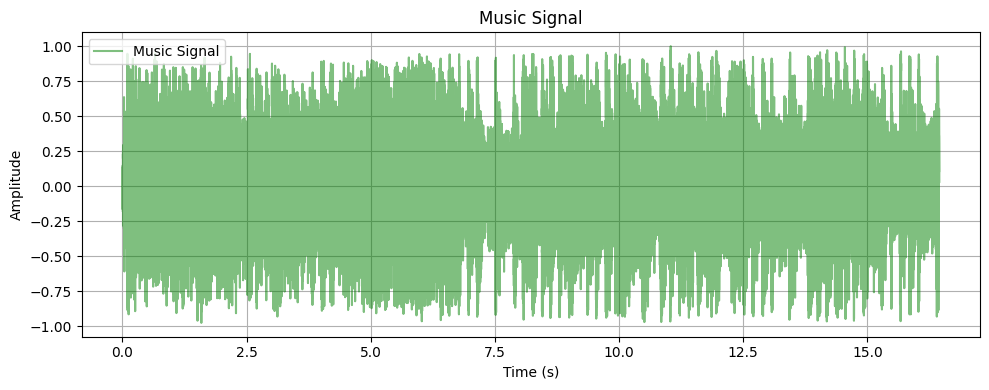

In [ ]:
# 1.0

import librosa
import numpy as np
import matplotlib.pyplot as plt

# Read the audio file and convert to mono
audio_signal, sr = librosa.load("music_dsp2024.wav", sr=44100, mono=True)

# Normalization of the signal
audio_signal = audio_signal / np.max(np.abs(audio_signal))

# Number of samples
N = 512

# Frame the signal using hanning window (assuming there is no overlap)
frames = librosa.util.frame(audio_signal, frame_length=N, hop_length=N)

# Apply hanning window to each frame
han_window = np.hanning(N)
frames_windowed = frames * han_window[:, np.newaxis]

# Plot of the music signal
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(audio_signal)) / sr, audio_signal, label='Music Signal', color='g', alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Music Signal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()






In [ ]:
# 1.1

# Definition of bark scale function
def bark(freq):
  return 13 * np.arctan(0.00076 * freq) + 3.5 * np.arctan((freq / 7500) ** 2)

# Defitnition of power spectrum P(k)
def calc_power_spectrum(frame):
  # fft of music signal
  audio_signal_fft = np.fft.fft(frame)

  # One side power spectrum
  power_spectrum = np.abs(audio_signal_fft[:N//2])**2

  # Normalization const
  PN = 90.302
  # Normalization in db
  power_spectrum_db = PN + 10 * np.log10(power_spectrum)

  return power_spectrum_db

# Calculate the power spectrum for each frame
#for frame in frames_windowed:
   #print(calc_power_spectrum(frame))


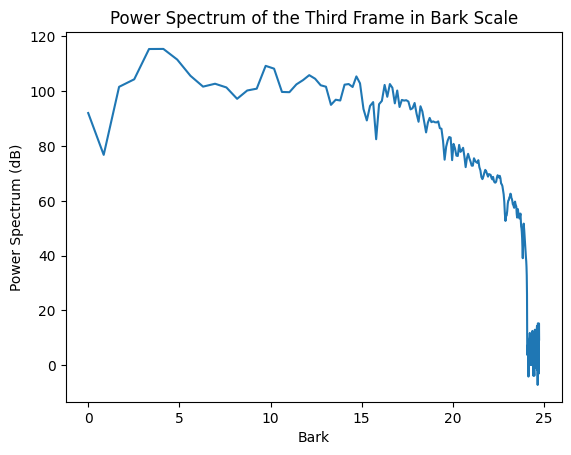

In [ ]:
# 1.1(plot)

# We select the third frame to plot
thrd_frame = frames_windowed[:, 2]

# Power spectrum for the selected frame
thrd_power_spctr = calc_power_spectrum(thrd_frame)

# x-axis frequencies from frequency bins
freqs = np.arange(len(thrd_power_spctr)) * (sr/N)

# Bark scale conversion of freqs
bark_scale = bark(freqs)

# Plot the power spectrum of the third frame in bark scale
plt.plot(bark_scale, thrd_power_spctr)
plt.xlabel('Bark')
plt.ylabel('Power Spectrum (dB)')
plt.title('Power Spectrum of the Third Frame in Bark Scale')
plt.show()


In [ ]:
# 1.2

def ST(power_spectrum):
    for frame in frames_windowed:
      ST = np.zeros(len(power_spectrum))

      for k in range(2, 249):
          if 2 <= k < 63:
              if power_spectrum[k] > power_spectrum[k - 1] and power_spectrum[k] > power_spectrum[k + 1] and power_spectrum[k] > power_spectrum[k + 2] + 7 and power_spectrum[k] > power_spectrum[k - 2] + 7:
                  ST[k] = True

          if 63 <= k < 127:
              if power_spectrum[k] > power_spectrum[k - 1] and power_spectrum[k] > power_spectrum[k + 1] and power_spectrum[k] > power_spectrum[k + 2] + 7 and power_spectrum[k] > power_spectrum[k - 2] + 7 and power_spectrum[k] > power_spectrum[k + 3] + 7 and power_spectrum[k] > power_spectrum[k - 3] + 7:
                  ST[k] = True

          if 127 <= k < 250:
              if power_spectrum[k] > power_spectrum[k - 1] and power_spectrum[k] > power_spectrum[k + 1] and power_spectrum[k] > power_spectrum[k + 2] + 7 and power_spectrum[k] > power_spectrum[k - 2] + 7 and power_spectrum[k] > power_spectrum[k + 3] + 7 and power_spectrum[k] > power_spectrum[k - 3] + 7 and power_spectrum[k] > power_spectrum[k + 4] + 7 and power_spectrum[k] > power_spectrum[k - 4] + 7 and power_spectrum[k] > power_spectrum[k + 5] + 7 and power_spectrum[k] > power_spectrum[k - 5] + 7 and power_spectrum[k] > power_spectrum[k + 6] + 7 and power_spectrum[k] > power_spectrum[k - 6] + 7:
                  ST[k] = True
      return ST


#for frame in frames_windowed:
    #spectrum = calc_power_spectrum(frame)
    #st = ST(spectrum)
    #print(st)



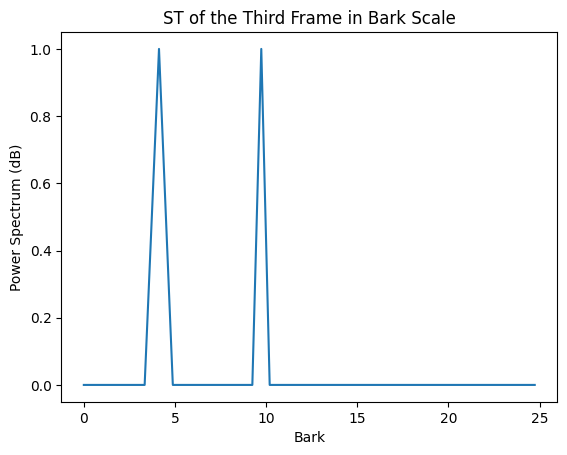

In [ ]:
# Plot ST for 3rd frame
thrd_frame = frames_windowed[:, 2]

# Calculate the spectrum for the selected frame
spectrum_thrd = calc_power_spectrum(thrd_frame)
st_thrd= ST(spectrum_thrd)
freqs_st = np.arange(len(st_thrd)) * (sr / N)

# Convert frequency axis to Bark scale
bark_scale_st = bark(freqs_st)

# Plot spectrum in Bark scale
plt.plot(bark_scale_st, st_thrd)

# Set labels and show plot
plt.xlabel('Bark')
plt.ylabel('Power Spectrum (dB)')
plt.title('ST of the Third Frame in Bark Scale')
plt.show()

In [ ]:
# 1.2 (PTM)

# Mask power
def PTM(power_spectrum, mask):
    ptm = np.zeros(len(power_spectrum))

    for k in range(0, len(power_spectrum)):
        if mask[k]:
            ptm[k] = (10 * np.log10(10**(0.1 * (power_spectrum[k - 1])) + 10**(0.1 * (power_spectrum[k])) + 10**(0.1 * (power_spectrum[k + 1]))))**2

    return ptm

# calculate and print every Ptm
#for frame in frames_windowed:
    #spectrum = calc_power_spectrum(frame)
    #s = ST(spectrum)
    #ptm = PTM(spectrum, s)
    #print(ptm)



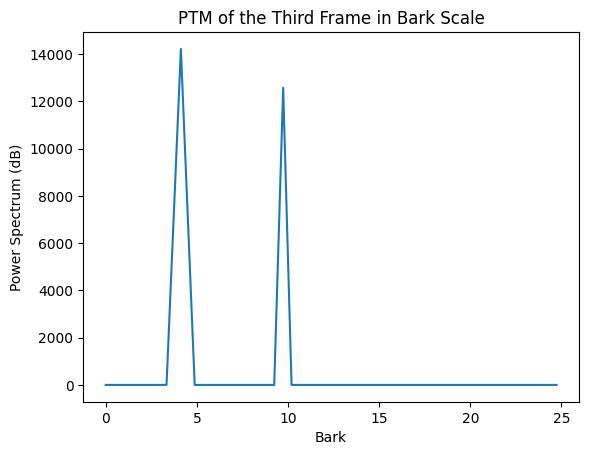

In [ ]:
#1.2(PTM plot)
thrd_frame = frames_windowed[:, 2]

# Calculate the spectrum for the selected frame
spectrum = calc_power_spectrum(thrd_frame)
ptm = PTM(spectrum, ST(spectrum))

freqs_ptm = np.arange(len(ptm)) * (sr / N)

# Convert frequency axis to Bark scale
bark_scale_ptm = bark(freqs_ptm)

# Plot spectrum in Bark scale
plt.plot(bark_scale_ptm, ptm)

# Set labels and show plot
plt.xlabel('Bark')
plt.ylabel('Power Spectrum (dB)')
plt.title('PTM of the Third Frame in Bark Scale')
plt.show()

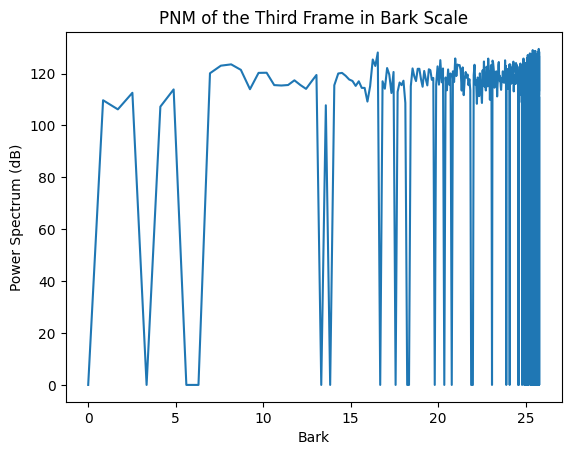

In [ ]:
# 1.2(PNM plot)

# load the given array of PNM
PNM = np.load('P_NM-24.npy')

# select the third frame
thrd_frame = frames_windowed[:, 2]
pnm_thrd = PNM[2]

freqs_pnm = np.arange(len(pnm_thrd)) * (sr / N)

# Convert frequency axis to Bark scale
bark_scale_pnm = bark(freqs_pnm)

# Plot spectrum in Bark scale
plt.plot(bark_scale_pnm, pnm_thrd)

# Set labels and show plot
plt.xlabel('Bark')
plt.ylabel('Power Spectrum (dB)')
plt.title('PNM of the Third Frame in Bark Scale')
plt.show()

In [ ]:
# 1.3

# load the given arrays
PTMc = np.load('P_TMc-24.npy')
PNMc = np.load('P_NMc-24.npy')

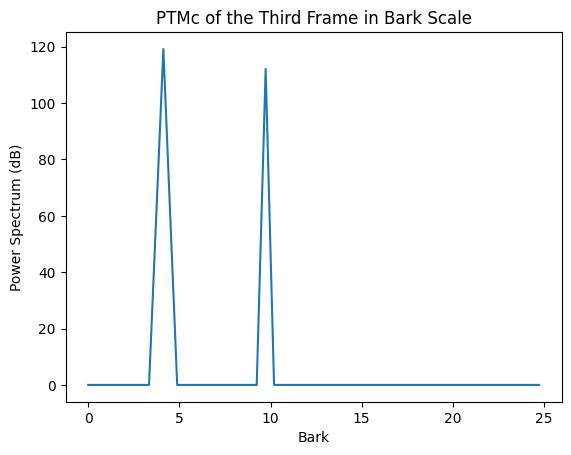

In [ ]:
#1.3(PTMc plot)

# Choose the 3rd frame from the PTMc table
frame3 = PTMc[:, 2]

freqs_PTM = np.arange(len(PTMc)) * (sr / N)

# Convert frequency axis to Bark scale
bark_scale_PTMc = bark(freqs_PTM)

# Plot spectrum in Bark scale
plt.plot(bark_scale_PTM, frame3)

# Set labels and show plot
plt.xlabel('Bark')
plt.ylabel('Power Spectrum (dB)')
plt.title('PTMc of the Third Frame in Bark Scale')
plt.show()

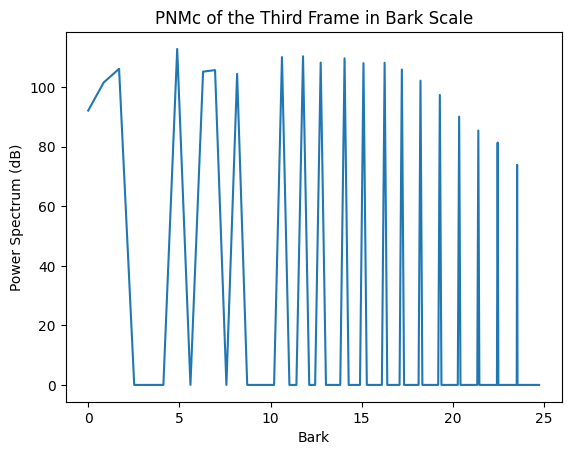

In [ ]:
#1.3(PNMc plot)

# Choose the 3rd frame from the PNMc table
frame3 = PNMc[:, 2]

freqs_PNMc = np.arange(len(PNMc)) * (sr / N)

# Convert frequency axis to Bark scale
bark_scale_PNMc = bark(freqs_PNMc)

# Plot spectrum in Bark scale
plt.plot(bark_scale_PNMc, frame3)

# Set labels and show plot
plt.xlabel('Bark')
plt.ylabel('Power Spectrum (dB)')
plt.title('PNMc of the Third Frame in Bark Scale')
plt.show()

In [ ]:
# 1.4

def Tq(frame):
    tq = np.zeros(len(frame))

    for f in range(1, len(frame)):
        tq[f] = 3.64 * (f / 1000) ** -0.8 - 6.5 * np.exp(-0.6 * (f / 1000 - 3.3) ** 2) + 10 ** -3 * (f / 1000) ** 4
    return tq

In [ ]:
def first_criterium_for_masks(power_spectrum, masks, ptm, tq):
    for k in range(0, len(power_spectrum)):
        if ptm[k] < tq[k]:
            masks[k] = False
    return masks

In [ ]:
def second_criterium_for_masks(power_spectrum, masks, ptm):
    bark_window_width = bark(0.5)
    for i in range(len(power_spectrum)):
        # Determine the start and end indices of the Bark window
        start_index = max(0, i - int(bark_window_width / 2))
        end_index = min(len(power_spectrum), i + int(bark_window_width / 2) + 1)

        # Find the maximum power within the Bark window
        max_power = max(ptm[start_index:end_index])

        # Replace all masks within the Bark window with the maximum power
        for j in range(start_index, end_index):
            if masks[j]:
                ptm[j] = max_power

    return ptm

In [ ]:
def sf(pm):
    sf = np.zeros((len(pm), len(pm)))

    for j in range(0, len(pm)):
        if pm[j] > 0:
            for i in range (0, len(pm)):
                diff = bark(i) - bark(j)
                if -3 <= diff < -1:
                    sf[i][j] = 17*diff - 0.4*pm[j] + 11
                if -1 <= diff < 0:
                    sf[i][j] = (0.4*pm[j] + 6)*diff
                if 0 <= diff < 1:
                    sf[i][j] = -17*diff
                if 1 <= diff < 8:
                    sf[i][j] = (0.15*pm[j] - 17)*diff -0.15*pm[j]
    return sf




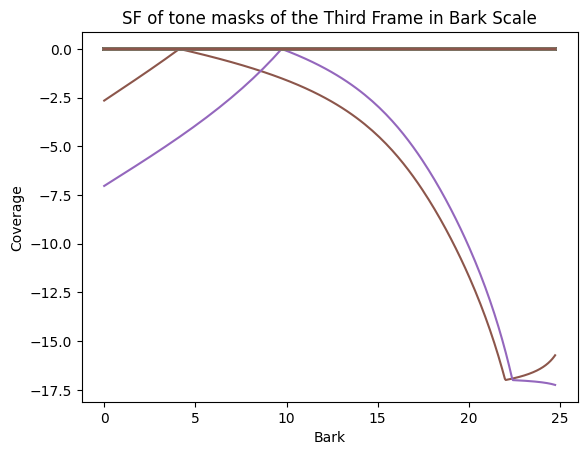

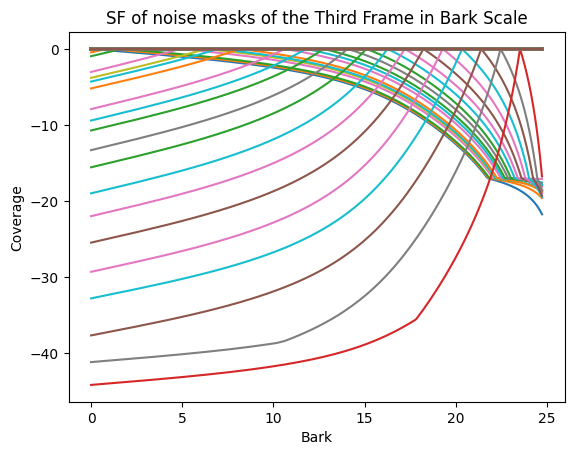

In [ ]:
# Plot ST for 3rd frame

# 3rd frame from PTMc table
PTMc_thrd = PTMc[:, 2]

#3rd frame from PNMc table
PNMc_thrd = PNMc[:, 2]

# Calculate Tq for 3rd frame
thrd_frame_ps = calc_power_spectrum(frames_windowed[:,2])
tq_thrd = Tq(thrd_frame_ps)

# Calculate the spectrum for the selected frame
#spectrum_thrd = calc_power_spectrum(thrd_frame)

# Check 1st criterium for 3rd frame tone masks
#st_thrd= ST(spectrum_thrd)
#PTM_thrd = PTM(spectrum_thrd, st_thrd)
#first_criterium_for_masks(spectrum_thrd, st_thrd, PTMc_thrd, tq_thrd)

# Check 2nd criterium for 3rd frame tone masks
#second_criterium_for_masks(spectrum_thrd, st_thrd, PTMc_thrd)

# SF of tone masks for the 3rd frame c
sf_tm = sf(PTMc_thrd)

freqs_sf_tm = np.arange(len(sf_tm)) * (sr / N)

# Convert frequency axis to Bark scale
bark_scale_sf_tm = bark(freqs_sf_tm)

# Check 1st criterium for 3rd frame noise masks
#PNM_thrd = PNM[2]
#first_criterium_for_masks(spectrum_thrd, st_thrd, PNM_thrd, tq_thrd)

# Check 2nd criterium for 3rd frame tone masks
#second_criterium_for_masks(spectrum_thrd, st_thrd, PNM_thrd)

# SF of noise masks for the 3rd frame
sf_nm = sf(PNMc_thrd)

freqs_sf_nm = np.arange(len(sf_nm)) * (sr / N)

# Convert frequency axis to Bark scale
bark_scale_sf_nm = bark(freqs_sf_nm)


# Plot SF for tone masks in Bark scale
plt.plot(bark_scale_sf_tm, sf_tm)

# Set labels and show plot
plt.xlabel('Bark')
plt.ylabel('Coverage')
plt.title('SF of tone masks of the Third Frame in Bark Scale')
plt.show()

# Plot SF for noise masks in Bark scale
plt.plot(bark_scale_sf_nm, sf_nm)

# Set labels and show plot
plt.xlabel('Bark')
plt.ylabel('Coverage')
plt.title('SF of noise masks of the Third Frame in Bark Scale')
plt.show()

In [ ]:
def ttm(sf, ptm):
    ttm = np.zeros((len(ptm), len(ptm)))

    for j in range(0, len(ptm)):
        for i in range (0, len(ptm)):
            ttm[i][j] = ptm[j] - 0.275*bark(j) + sf[i][j] - 6.025

    return ttm



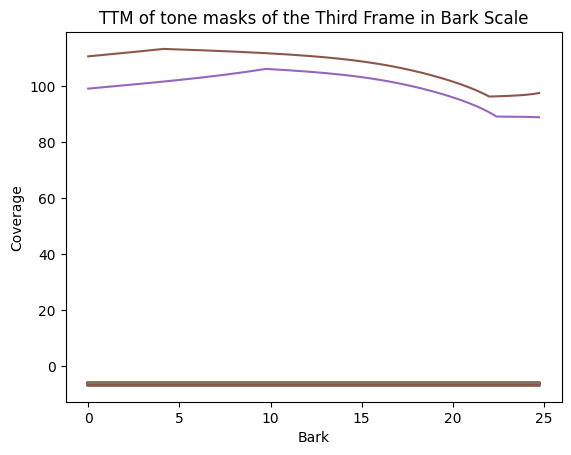

In [ ]:
# Calculating ttm for the 3rd frame
ttm_thrd = ttm(sf_tm, PTMc_thrd)

freqs_ttm_thrd = np.arange(len(ttm_thrd)) * (sr / N)

# Convert frequency axis to Bark scale
bark_scale_ttm_thrd = bark(freqs_ttm_thrd)

# Plot TTM for tone masks in Bark scale
plt.plot(bark_scale_ttm_thrd, ttm_thrd)

# Set labels and show plot
plt.xlabel('Bark')
plt.ylabel('Coverage')
plt.title('TTM of tone masks of the Third Frame in Bark Scale')
plt.show()


In [ ]:
def tnm(sf, pnm):
    tnm = np.zeros((len(pnm), len(pnm)))

    for j in range(0, len(pnm)):
        for i in range (0, len(pnm)):
            tnm[i][j] = pnm[j] - 0.175*bark(j) + sf[i][j] - 2.025

    return tnm



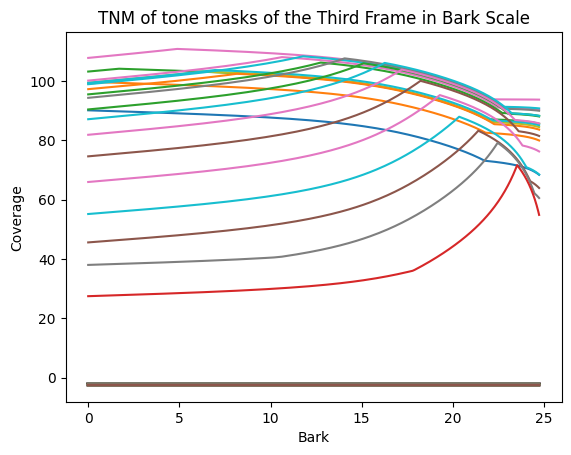

In [ ]:
# Calculating tnm for the 3rd frame
tnm_thrd = tnm(sf_nm, PNMc_thrd)

freqs_tnm_thrd = np.arange(len(tnm_thrd)) * (sr / N)

# Convert frequency axis to Bark scale
bark_scale_tnm_thrd = bark(freqs_tnm_thrd)

# Plot TTM for tone masks in Bark scale
plt.plot(bark_scale_tnm_thrd, tnm_thrd)

# Set labels and show plot
plt.xlabel('Bark')
plt.ylabel('Coverage')
plt.title('TNM of tone masks of the Third Frame in Bark Scale')
plt.show()

In [ ]:
# 1.5

def Tg(Tq, TTM, TNM):
    min_length = min(len(Tq), len(TTM), len(TNM))
    tg = np.zeros(min_length)
    for i in range(min_length):
        tg[i] = 10 * np.log10(10**(0.1 * Tq[i]) + np.sum(10**(0.1 * TTM[i][:256])) + np.sum(10**(0.1 * TNM[i][:256])))
    return tg

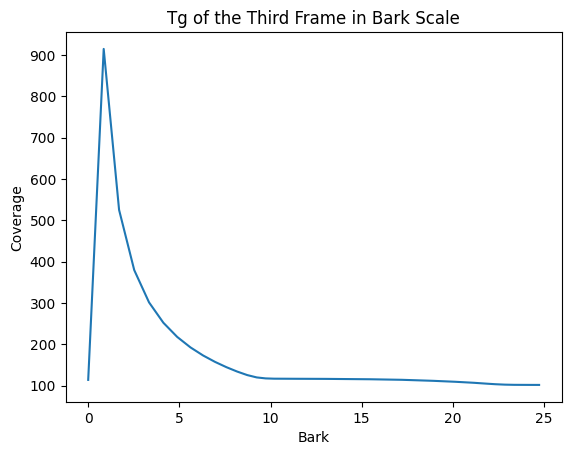

In [ ]:
# 1.5(plot)

tg_thrd = Tg(tq_thrd, ttm_thrd, tnm_thrd)

freqs_tg = np.arange(len(tg_thrd)) * (sr / N)

# Convert frequency axis to Bark scale
bark_scale_tg = bark(freqs_tg)


# Plot Tg in Bark scale
plt.plot(bark_scale_tg, tg_thrd)

# Set labels and show plot
plt.xlabel('Bark')
plt.ylabel('Coverage')
plt.title('Tg of the Third Frame in Bark Scale')
plt.show()
